In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob

In [2]:
hdul = fits.open("Datos/Light_NGC_1976_sloan_i_5.000secs_00000157.fit")
hdul.info()

Filename: Datos/Light_NGC_1976_sloan_i_5.000secs_00000157.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      63   (4096, 4096)   int16 (rescales to uint16)   


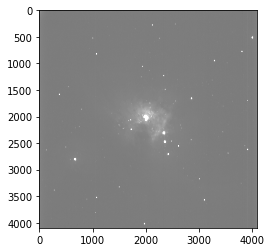

In [3]:
image= np.array(hdul[0].data)
plt.imshow(image,cmap="gray",vmax=np.mean(image)+np.std(image),vmin=np.mean(image)-np.std(image))

In [4]:
def Fits_Array(a):
    b=np.empty([4096,4096,0])
    for i in range(len(a)):
        x=fits.open(a[0])
        b=np.dstack((b,np.array(x[0].data)))
    return b

In [5]:
b=glob.glob('datos_OMA/BIAS*.fit')
d=glob.glob('datos_OMA/DARK_5*.fit')
fb=glob.glob('datos_OMA/FLAT_B*.fit')
fsg=glob.glob('datos_OMA/FLAT_sloan_g*.fit')
fsi=glob.glob('datos_OMA/FLAT_sloan_i*.fit')
fsr=glob.glob('datos_OMA/FLAT_sloan_r*fit')
fv=glob.glob('datos_OMA/FLAT_V*.fit')
Lb=glob.glob('datos_OMA/Light_NGC_1976_B*.fit')
Lsg=glob.glob('datos_OMA/Light_NGC_1976_sloan_g*.fit')
Lsi=glob.glob('datos_OMA/Light_NGC_1976_sloan_i*.fit')
Lsr=glob.glob('datos_OMA/Light_NGC_1976_sloan_r*.fit')
Lv=glob.glob('datos_OMA/Light_NGC_1976_v*.fit')
Lb2=glob.glob('datos_OMA/Light_NGC_104_B*.fit')
Lsg2=glob.glob('datos_OMA/Light_NGC_104_sloan_g*.fit')
Lsi2=glob.glob('datos_OMA/Light_NGC_104_sloan_i*.fit')
Lsr2=glob.glob('datos_OMA/Light_NGC_104_sloan_r*.fit')
Lv2=glob.glob('datos_OMA/Light_NGC_104_V*.fit')

In [6]:
Bias=Fits_Array(b)
Dark=Fits_Array(d)
FLAT_B=Fits_Array(fb)
FLAT_sloan_g=Fits_Array(fsg)
FLAT_sloan_i=Fits_Array(fsi)
FLAT_sloan_r=Fits_Array(fsr)
FLAT_V=Fits_Array(fv)

## Nebulosa de Orion ##

In [7]:
Light_B=Fits_Array(Lb)
Light_sloan_g=Fits_Array(Lsg)
Light_sloan_i=Fits_Array(Lsi)
Light_sloan_r=Fits_Array(Lsr)
Light_V=Fits_Array(Lv)

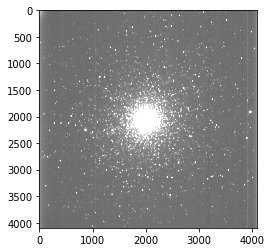

In [12]:
plt.imshow(Light_V2[:,:,1],cmap='gray',vmin=Light_V2[:,:,1].mean()-Light_V2[:,:,1].std(),vmax=Light_V2[:,:,1].mean()+Light_V2[:,:,1].std())

## 47 Tucanae ##

In [11]:
Light_B2=Fits_Array(Lb2)
Light_sloan_g2=Fits_Array(Lsg2)
Light_sloan_i2=Fits_Array(Lsi2)
Light_sloan_r2=Fits_Array(Lsr2)
Light_V2=Fits_Array(Lv2)

In [26]:
Master_Bias=np.mean(Bias,axis=2)

array([[1004., 1008., 1017., ..., 1005.,  993.,  996.],
       [1016., 1027., 1004., ...,  990., 1002., 1004.],
       [1020.,  993., 1014., ..., 1006., 1008., 1010.],
       ...,
       [1010., 1012., 1012., ..., 1014., 1003., 1012.],
       [1009., 1002.,  998., ...,  993., 1018.,  993.],
       [1011., 1012., 1011., ..., 1005., 1013., 1009.]])

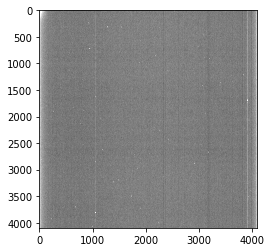

In [35]:
plt.imshow(Dark[:,:,1],cmap='gray',vmax=Dark[:,:,1].mean()+Dark[:,:,1].std(),vmin=Dark[:,:,1].mean()-Dark[:,:,1].std())

In [36]:
Master_Dark=np.mean(Dark,axis=2)

In [ ]:
Master_Flat_B=